In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
%matplotlib inline 

In [63]:
#load the data 
df = pd.read_csv('Task1.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [64]:
#generate summary statistics
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [65]:
df.isna().sum() #no null values are present

Hours     0
Scores    0
dtype: int64

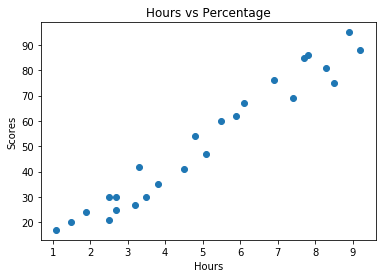

In [66]:
#does data follow linear relationship?

plt.scatter(df['Hours'] , df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Percentage')
plt.show()

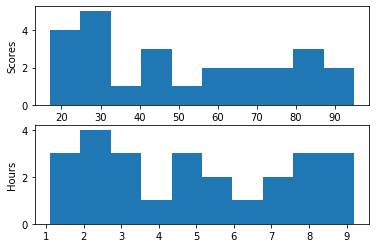

In [67]:
#variation of each variable
fig = plt.figure()
plt.subplot(2 ,1 ,2)
plt.ylabel('Hours')
plt.hist(df['Hours'])

plt.subplot(2 ,1 ,1)
plt.ylabel('Scores')
plt.hist(df['Scores'])
plt.show()

In [68]:
#detailed statistics of model fit
#r2 square suggests model is a good fit, low value of f-statistic suggests the variable is
#statistically significant. and low likelihood as well as slighlty higher p-value (than benchmark < 0.5) suggests data is 
#synthetically made or just the lack of enough data(just 25 entries)

mtmodel = ols("Hours ~ Scores" , data = df).fit()
mtmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Hours   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           9.13e-17
Time:                        23:40:57   Log-Likelihood:                -19.914
No. Observations:                  25   AIC:                             43.83
Df Residuals:                      23   BIC:                             46.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0063      0.258     -0.024      0.981      -0.540       0.528
Scores         0.0975      0.005     21.583      0.000       0.088       0.107
==============================================================================
Omnibus:                        4.088   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.129   Jarque-Bera (JB):                1.980
Skew:                           0.388   Prob(JB):                        0.372
Kurtosis:                       1.860   Cond. No.                         132.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R2 score on train data =  0.9534955397584735


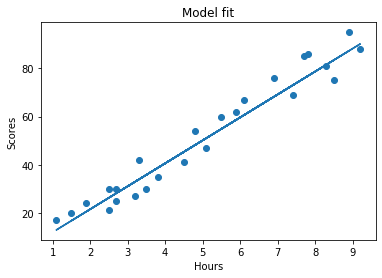

In [69]:
#using sklearn linear regression 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = df.drop('Scores' , axis = 1).to_numpy()
y = df['Scores'].to_numpy()

x_train , x_test , y_train ,y_test = train_test_split(x ,y,test_size = 0.2)

model = LinearRegression()

model.fit(x_train , y_train)

#check accuracy of model
print("R2 score on train data = " , model.score(x_train , y_train))

line = model.coef_*x+model.intercept_

plt.scatter(x, y)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Model fit')
plt.plot(x, line);
plt.show()

[[2.5]
 [1.9]
 [7.8]
 [6.1]
 [7.7]]
R2 score on test data =  0.9329948320335358


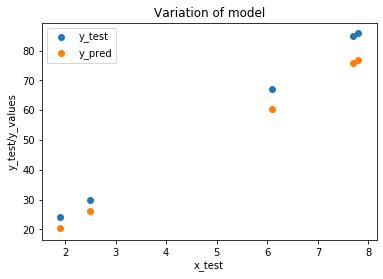

In [70]:
print(x_test) # Testing data - In Hours
y_pred = model.predict(x_test) # Predicting the scores

print("R2 score on test data = " , model.score(x_test , y_test))
#predicted values against test values
plt.scatter(x_test , y_test , label = 'y_test')
plt.scatter(x_test , y_pred , label = 'y_pred')
plt.xlabel('x_test')
plt.ylabel('y_test/y_values')
plt.legend()
plt.title('Variation of model')
plt.show()

In [71]:
#on value hour = 9.25 hrs

hours = np.array([9.25]).reshape(1 , -1)
val = model.predict(hours)
print("No of Hours = 9.25")
print("Predicted Score = {}".format(val[0]))

No of Hours = 9.25
Predicted Score = 90.5984143933844
